In [1]:
import numpy as np
import open3d as o3d
from sklearn.ensemble import RandomForestClassifier
import pdal
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plyfile import PlyData, PlyElement

sns.set()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# ROOT_PLY = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/L001.ply"""

In [3]:
# pipeline_json = [
#     {
#         "type": "readers.ply",
#         "filename": ROOT_PLY
#     }
        
# ]


# pipeline = pdal.Pipeline(json.dumps(pipeline_json))

# # Execute the pipeline
# # This will process the data according to the stages defined in the pipeline
# pipeline.execute()

# xy = pipeline.arrays[0]

# mta = pipeline.metadata



In [4]:
# xyzT = np.array((xy["X"], xy["Y"], xy["Z"])).T
# xyz = xyzT - np.min(xyzT, axis = 0)

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(xyz)

In [5]:
ROOT  = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/pickleFiles/2025_10_23T22_14_L001_r_0_1_grid_0_02_features.npz"""
ROOT_2  = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/pickleFiles/2025_10_23T23_39_L001_r_0_2_grid_0_04_features.npz"""
ROOT_3  = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/pickleFiles/2025_10_24T05_30_L001_r_0_4_grid_0_08_features.npz"""
ROOT_4  = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/pickleFiles/2025_10_24T11_50_L001_r_0_8_grid_0_16_features.npz"""
ROOT_5  = """/home/sspiegel/CapstoneData/Paris/Toronto_3D/pickleFiles/2025_10_24T12_27_L001_r_1_6_grid_0_32_features.npz"""

In [6]:
fileList = [ROOT,ROOT_2, ROOT_3,ROOT_4,ROOT_5]

In [7]:
def labelPoints(row):
    if row == 0:
        return "Unclassified"
    elif row == 1:
        return "Ground"
    elif row == 2:
        return "Road_markings"
    elif row == 3:
        return "Natural"
    elif row == 4:
        return "Building"
    elif row == 5:
        return "Utility_line"
    elif row == 6:
        return "Pole"
    elif row == 7:
        return "Car"
    elif row == 8:
        return "Fence"
    else:
        return -1

In [8]:
das = [np.load(r)["array2"] for r in fileList]

In [9]:
das = np.hstack(das)

In [10]:
xyz = np.load(fileList[0])["array1"]

cls = np.load(fileList[0])["array3"]

In [11]:
"""
Unclassified 0
Ground 1
Road_markings 2
Natural 3
Building 4
Utility_line 5
Pole 6
Car 7
Fence 8
"""

'\nUnclassified 0\nGround 1\nRoad_markings 2\nNatural 3\nBuilding 4\nUtility_line 5\nPole 6\nCar 7\nFence 8\n'

In [12]:
cols = ["EigenSum","omnivariance","entropy","linearity","planarity","sphericity","curvature","verticality1","verticality2","count"]

In [13]:
# cols1 = [f"""{a}_radius1""" for a in cols]
# cols2 = [f"""{a}_radius2""" for a in cols]
ff = []

for i in range(1, len(fileList) + 1):
    col = [f"""{a}_radius{i}""" for a in cols]
    ff += col
    

# allCols = cols1 + cols2
    
    
    

In [14]:
ff

['EigenSum_radius1',
 'omnivariance_radius1',
 'entropy_radius1',
 'linearity_radius1',
 'planarity_radius1',
 'sphericity_radius1',
 'curvature_radius1',
 'verticality1_radius1',
 'verticality2_radius1',
 'count_radius1',
 'EigenSum_radius2',
 'omnivariance_radius2',
 'entropy_radius2',
 'linearity_radius2',
 'planarity_radius2',
 'sphericity_radius2',
 'curvature_radius2',
 'verticality1_radius2',
 'verticality2_radius2',
 'count_radius2',
 'EigenSum_radius3',
 'omnivariance_radius3',
 'entropy_radius3',
 'linearity_radius3',
 'planarity_radius3',
 'sphericity_radius3',
 'curvature_radius3',
 'verticality1_radius3',
 'verticality2_radius3',
 'count_radius3',
 'EigenSum_radius4',
 'omnivariance_radius4',
 'entropy_radius4',
 'linearity_radius4',
 'planarity_radius4',
 'sphericity_radius4',
 'curvature_radius4',
 'verticality1_radius4',
 'verticality2_radius4',
 'count_radius4',
 'EigenSum_radius5',
 'omnivariance_radius5',
 'entropy_radius5',
 'linearity_radius5',
 'planarity_radius5'

In [15]:
allCols = ['X', 'Y','Z'] + ff + ['label']

In [16]:
allAtrs = np.hstack((xyz,das, cls.reshape(-1, 1)))

In [17]:
total_dataframe = pd.DataFrame(allAtrs, columns=allCols)
total_dataframe["label"] = total_dataframe["label"].astype(int)
for i in range(1, len(fileList) + 1):
    total_dataframe[f"""count_radius{i}"""] = total_dataframe[f"""count_radius{i}"""].astype(int)
# total_dataframe["count_radius1"] = total_dataframe["count_radius1"].astype(int)
# total_dataframe["count_radius2"] = total_dataframe["count_radius2"].astype(int)

# total_dataframe["labelName"] = total_dataframe["label"].apply(labelPoints)

In [16]:
# ss = ss[ss["count"] > 10]

In [17]:
"""
Unclassified 0
Ground 1
Road_markings 2
Natural 3
Building 4
Utility_line 5
Pole 6
Car 7
Fence 8
"""

'\nUnclassified 0\nGround 1\nRoad_markings 2\nNatural 3\nBuilding 4\nUtility_line 5\nPole 6\nCar 7\nFence 8\n'

In [19]:
# for i in range(9):
#     print("""percent for class %d: %.4f""" % (i, 100*(cls[cls == i].shape[0]/cls.shape[0])))

In [20]:
# total_dataframe.reset_index(inplace = True)

In [30]:
# tpsOut = []
# for idx, tpe in total_dataframe.dtypes.to_dict().items():
#     if tpe == 'int64':
#         tpsOut.append((idx, 'i4'))
#     elif tpe == 'float64':
#         tpsOut.append((idx, 'f8'))
        
# vertex_data = np.empty(allAtrs.shape[0], dtype=tpsOut)

# for t in tpsOut:
#     vertex_data[t[0]] = total_dataframe[t[0]].values

    
# el = PlyElement.describe(vertex_data, 'vertex')

# # Create a PlyData object and write to a PLY file
# # Set text=True for ASCII PLY, or text=False for binary PLY
# PlyData([el], text=False).write("""/home/sspiegel/CapstoneData/Paris/Toronto_3D/PC_with_features/L001_features.ply""")

In [22]:

# tpsOut

## Boxplot


In [18]:
ss = total_dataframe.sample(frac = 0.1, random_state = 123)

In [20]:
ss

,X,Y,Z,EigenSum_radius1,omnivariance_radius1,entropy_radius1,linearity_radius1,planarity_radius1,sphericity_radius1,curvature_radius1,...,omnivariance_radius5,entropy_radius5,linearity_radius5,planarity_radius5,sphericity_radius5,curvature_radius5,verticality1_radius5,verticality2_radius5,count_radius5,label
15436725,131.359009,210.303955,10.783005,0.004772,0.000428,0.028882,0.166411,0.828222,0.005367,0.002918,...,0.010848,0.558968,0.070885,0.929110,0.000004,0.000002,0.025941,1.540627,80,1
8925910,120.111008,194.805969,16.494003,0.005392,0.001670,0.033731,0.214749,0.396975,0.388276,0.178639,...,0.404273,1.054404,0.111263,0.350386,0.538352,0.221810,0.435142,1.073354,279,3
478091,162.087006,96.057983,8.679993,0.003473,0.000532,0.021658,0.786833,0.180649,0.032518,0.026104,...,0.028338,0.562862,0.022707,0.977210,0.000083,0.000042,0.003832,1.553310,80,1
19829578,146.279999,118.735962,9.852997,0.005111,0.001030,0.031159,0.101050,0.829605,0.069345,0.035231,...,0.308567,0.864566,0.272851,0.576475,0.150673,0.080238,0.667499,0.883347,137,7
15249811,130.839996,204.723999,10.723007,0.005468,0.000481,0.032279,0.307854,0.687328,0.004818,0.002839,...,0.019700,0.626312,0.352879,0.647083,0.000038,0.000023,0.022852,1.544008,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185777,130.748001,198.654968,10.615997,0.005141,0.000607,0.030841,0.047439,0.939415,0.013146,0.006687,...,0.252824,0.642123,0.313166,0.639027,0.047807,0.027560,0.120237,1.441936,102,1
5856266,121.376999,182.402954,17.382996,0.004144,0.001062,0.026428,0.449092,0.400552,0.150356,0.088379,...,0.165478,0.778875,0.575283,0.365432,0.059285,0.039949,1.497364,0.072913,73,4
1397289,132.471008,76.520996,8.459000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143787,0.624570,0.379787,0.608236,0.011978,0.007338,0.285536,1.138876,98,0
18179366,124.701004,206.632996,10.781006,0.005134,0.000583,0.030785,0.087265,0.901312,0.011423,0.005937,...,0.019652,0.532569,0.155559,0.844417,0.000023,0.000013,0.018049,1.538837,85,1


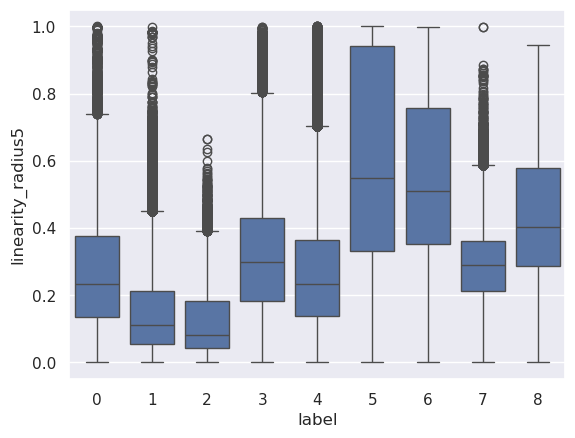

In [21]:
sns.boxplot(ss, x = "label", y = "linearity_radius5")
plt.show()

In [23]:
rf = RandomForestClassifier(verbose=1, n_jobs=-1)

In [24]:
rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
total_dataframe.reset_index(inplace = True)

In [26]:
Xy = total_dataframe.to_numpy()

X = Xy[:,4:-1]
y = total_dataframe["label"].to_numpy()

In [102]:
idx = np.random.randint(low=0, high=X.shape[0],size = 100000)    

In [103]:
idx

array([8136783, 8465593, 1048984, ..., 3698086, 2116583, 2637670],
      shape=(100000,))

In [104]:
X_beta = X[idx]
y_beta = y[idx]

In [105]:
rf.fit(X_beta, y_beta)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names = X_beta, 
#                class_names=y_beta,
#                filled = True);
# # fig.savefig('rf_individualtree.png')

In [106]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 1,
 'warm_start': False}

In [107]:
idx2 = np.random.randint(0, X.shape[0], size = 10000)

In [108]:
Xtest = X[idx2]

In [109]:
ytest = y[idx2]

In [110]:
yp = rf.predict(Xtest)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [111]:
(yp == ytest).sum()

np.int64(8838)